<a href="https://colab.research.google.com/github/OmarAlsaqa/Speech_Emotion_Recognition/blob/master/SpeechEmotionsRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **unzip the data** -first time only-

In [0]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "/content/drive/My Drive/Colab Notebooks/SER_Data/Audio_Song_Actors_01-24.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall('DS') 
    print('Done!') 

File Name                                             Modified             Size
Actor_01/                                      2018-03-22 15:54:06            0
Actor_01/03-02-01-01-01-01-01.wav              2018-03-22 15:54:12       452990
Actor_01/03-02-01-01-01-02-01.wav              2018-03-22 15:54:12       456190
Actor_01/03-02-01-01-02-01-01.wav              2018-03-22 15:54:12       446582
Actor_01/03-02-01-01-02-02-01.wav              2018-03-22 15:54:12       443380
Actor_01/03-02-02-01-01-01-01.wav              2018-03-22 15:54:12       465804
Actor_01/03-02-02-01-01-02-01.wav              2018-03-22 15:54:12       469008
Actor_01/03-02-02-01-02-01-01.wav              2018-03-22 15:54:12       478616
Actor_01/03-02-02-01-02-02-01.wav              2018-03-22 15:54:12       472210
Actor_01/03-02-02-02-01-01-01.wav              2018-03-22 15:54:12       497836
Actor_01/03-02-02-02-01-02-01.wav              2018-03-22 15:54:12       478618
Actor_01/03-02-02-02-02-01-01.wav       

In [0]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "/content/drive/My Drive/Colab Notebooks/SER_Data/Audio_Speech_Actors_01-24.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall('DS') 
    print('Done!') 

File Name                                             Modified             Size
Actor_01/                                      2018-03-22 15:54:06            0
Actor_01/03-01-01-01-01-01-01.wav              2018-03-22 15:54:06       375720
Actor_01/03-01-01-01-01-02-01.wav              2018-03-22 15:54:06       379106
Actor_01/03-01-01-01-02-01-01.wav              2018-03-22 15:54:06       372698
Actor_01/03-01-01-01-02-02-01.wav              2018-03-22 15:54:06       363108
Actor_01/03-01-02-01-01-01-01.wav              2018-03-22 15:54:06       399494
Actor_01/03-01-02-01-01-02-01.wav              2018-03-22 15:54:06       751848
Actor_01/03-01-02-01-02-01-01.wav              2018-03-22 15:54:06       396294
Actor_01/03-01-02-01-02-02-01.wav              2018-03-22 15:54:06       393086
Actor_01/03-01-02-02-01-01-01.wav              2018-03-22 15:54:06       415516
Actor_01/03-01-02-02-01-02-01.wav              2018-03-22 15:54:08       444344
Actor_01/03-01-02-02-02-01-01.wav       

# **Important library**

In [0]:
!pip install librosa

# **Visualization**

In [0]:
import os
import pandas as pd
import glob 
import librosa
import matplotlib.pyplot as plt
from librosa import display
import IPython.display as ipd

In [0]:
path_ex = '/content/DS/Actor_04/03-01-01-01-01-01-04.wav'
#load a sample
data, sampling_rate = librosa.load(path_ex)
#listen to the sample
ipd.Audio(path_ex)

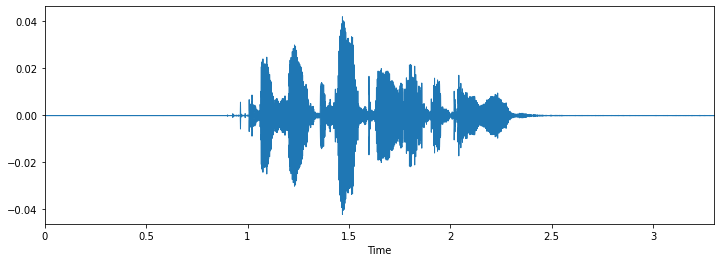

In [0]:
#plot the signal shape
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

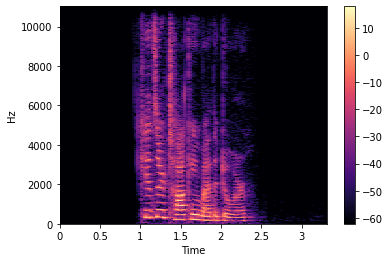

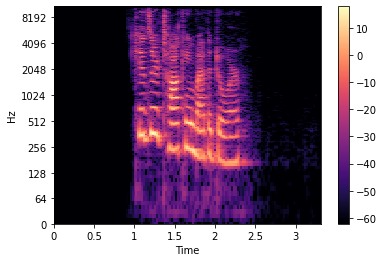

In [0]:
#display Spectrogram
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
#print frequencies  
plt.figure()
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz') 
plt.colorbar()
#print log of frequencies  
plt.figure()
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar()

(20, 143)


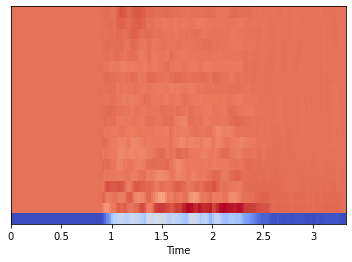

In [0]:
mfccs = librosa.feature.mfcc(data, sr=sampling_rate)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

# **Augmentations Functions**

In [0]:
import numpy as np
def NoiseInjection(data, noise_factor):
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise
    # Cast back to same data type
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data

In [0]:
import numpy as np
def ShiftingTime(data, sampling_rate, shift_max, shift_direction):
    shift = int(sampling_rate * shift_max)
    if shift_direction == 'right':
        shift = -shift
    if shift_direction == 'right':
        shift = +shift
    elif shift_direction == 'both':
        direction = np.random.randint(0, 2)
        if direction == 1:
            shift = -shift
    
    augmented_data = np.roll(data, shift)
    # Set to silence for heading/ tailing
    if shift > 0:
        augmented_data[:shift] = 0
    else:
        augmented_data[shift:] = 0
    return augmented_data

In [0]:
import librosa
def ChangingPitch(data, sampling_rate, pitch_factor):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [0]:
import librosa
def ChangingSpeed(data, speed_factor):
    return librosa.effects.time_stretch(data, speed_factor)

# Load all files and add aumgmentation

In [0]:
import os
import time
import numpy as np
import librosa

path = '/content/DS'
lst = []

start_time = time.time()
for subdir, dirs, files in os.walk(path):
  for file in files:
    try:
      #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
      X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
      #noise
      S = NoiseInjection(X, .002)
      #shl
      D = ShiftingTime(X, sampling_rate, 1, shift_direction='right')
      #shr
      E = ShiftingTime(X, sampling_rate, .9, shift_direction='left')
      #pitch
      F = ChangingPitch(X, sampling_rate, 1)
      #speed
      G = ChangingSpeed(X, 1.5)
      #original
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
      #noise
      mfccs1 = np.mean(librosa.feature.mfcc(y=S, sr=sample_rate, n_mfcc=40).T,axis=0)
      #shl
      mfccs2 = np.mean(librosa.feature.mfcc(y=D, sr=sample_rate, n_mfcc=40).T,axis=0)
      #shr
      mfccs3 = np.mean(librosa.feature.mfcc(y=E, sr=sample_rate, n_mfcc=40).T,axis=0)
      #pitch
      mfccs4 = np.mean(librosa.feature.mfcc(y=F, sr=sample_rate, n_mfcc=40).T,axis=0)
      #speed
      mfccs5 = np.mean(librosa.feature.mfcc(y=G, sr=sample_rate, n_mfcc=40).T,axis=0)
      # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
      # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
      file = int(file[7:8]) - 1 
      if file == 1:
        file = 0
      #if file == 7:
      #  file = 6
      if file > 1:
        file = file - 1
      #Original
      arr = mfccs, file
      lst.append(arr)
      #noise
      arr1 = mfccs1, file
      lst.append(arr1)
      #shifting left
      arr2 = mfccs2, file
      lst.append(arr2)
      #shifting right
      arr3 = mfccs3, file
      lst.append(arr3)
      #changing pitch
      arr4 = mfccs4, file
      lst.append(arr4)
      #changing speed
      arr5 = mfccs5, file
      lst.append(arr5)
    # If the file is not valid, skip it
    except ValueError:
      continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))
# 0 = neutral, 1 = happy, 2 = sad, 3 = angry, 4 = fearful, 5 = disgust, 6 = surprised

--- Data loaded. Loading time: 931.014369726181 seconds ---


In [0]:
# Creating X and y: zip makes a list of all the first elements, and a list of all the second elements.
X, y = zip(*lst)

In [0]:
set(y)

{0, 1, 2, 3, 4, 5, 6}

In [0]:
import numpy as np
X = np.asarray(X)
y = np.asarray(y)

X.shape, y.shape

((1440, 40), (1440,))

In [0]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 3384, 1: 2256, 2: 2256, 3: 2256, 4: 2256, 5: 1152, 6: 1152}

In [0]:
# Saving joblib files to not load them again with the loop above

import joblib

X_name = 'X6D.joblib'
y_name = 'y6D.joblib'
save_dir = '/content/drive/My Drive/Colab Notebooks/SER_loadedmodels'

savedX = joblib.dump(X, os.path.join(save_dir, X_name))
savedy = joblib.dump(y, os.path.join(save_dir, y_name))

In [0]:
import joblib

# Loading saved models

X = joblib.load('/content/drive/My Drive/Colab Notebooks/SER_loadedmodels/X6D.joblib')
y = joblib.load('/content/drive/My Drive/Colab Notebooks/SER_loadedmodels/y6D.joblib')

# **Divide data to train and**

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier

To make a first attempt in accomplishing this classification task I chose a decision tree:

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtree = DecisionTreeClassifier()

In [0]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
predictions = dtree.predict(X_test)

Let's go with our classification report.

Before we start, a quick reminder of the classes we are trying to predict:

emotions = {
    "neutral": "0",
    "calm": "1",
    "happy": "2",
    "sad": "3",
    "angry": "4", 
    "fearful": "5", 
    "disgust": "6", 
    "surprised": "7"
}

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       692
           1       0.70      0.70      0.70       490
           2       0.63      0.59      0.61       457
           3       0.78      0.74      0.76       455
           4       0.61      0.67      0.64       402
           5       0.60      0.59      0.60       226
           6       0.62      0.64      0.63       221

    accuracy                           0.69      2943
   macro avg       0.68      0.67      0.67      2943
weighted avg       0.70      0.69      0.69      2943



# SVM

In this second approach, I switched to a SVM classifier.

In [0]:
from sklearn import svm

In [0]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear', verbose = 1) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

[LibSVM]

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
metrics.classification_report

Accuracy: 0.5837580699966021


<function sklearn.metrics._classification.classification_report>

In [0]:
print("report:",metrics.classification_report(y_test, y_pred))

report:               precision    recall  f1-score   support

           0       0.57      0.81      0.67       692
           1       0.60      0.51      0.55       490
           2       0.57      0.48      0.52       457
           3       0.75      0.66      0.70       455
           4       0.51      0.50      0.51       402
           5       0.52      0.38      0.44       226
           6       0.52      0.44      0.48       221

    accuracy                           0.58      2943
   macro avg       0.58      0.54      0.55      2943
weighted avg       0.59      0.58      0.58      2943



# Random Forest

In this third approach, I switched to a random forest classifier and I made a gridsearch to make some hyperparameters tuning.

The gridsearch is not shown in the code below otherwise the notebook will require too much time to run.

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rforest = RandomForestClassifier(criterion="gini", max_depth=10, max_features="log2", 
                                 max_leaf_nodes = 100, min_samples_leaf = 3, min_samples_split = 20, 
                                 n_estimators= 22000, random_state= 5)

In [0]:
rforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='log2',
                       max_leaf_nodes=100, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=22000,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [0]:
predictions = rforest.predict(X_test)

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.56      0.99      0.71       692
           1       0.85      0.50      0.63       490
           2       0.86      0.37      0.51       457
           3       0.73      0.79      0.76       455
           4       0.63      0.64      0.63       402
           5       0.67      0.29      0.41       226
           6       0.53      0.57      0.55       221

    accuracy                           0.65      2943
   macro avg       0.69      0.59      0.60      2943
weighted avg       0.70      0.65      0.63      2943



# Neural network

Let's build our neural network!

To do so, we need to expand the dimensions of our array, adding a third one using the numpy "expand_dims" feature.

In [4]:
y_train[:5]

[0, 5, 1, 0, 5]

In [5]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(y_train, 7)

Using TensorFlow backend.


In [0]:
import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [7]:
x_traincnn.shape, x_testcnn.shape

((11769, 40, 1), (2943, 40, 1))

In [0]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional, GRU
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.layers.normalization import BatchNormalization

In [0]:
model = Sequential()

model.add(Conv1D(32, 3,padding='same',bias_initializer='zeros',input_shape=(40,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv1D(64, 3,padding='same',bias_initializer='zeros',input_shape=(40,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv1D(28, 3,padding='same',bias_initializer='zeros',input_shape=(40,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Bidirectional(LSTM(40, return_sequences=True, bias_initializer='ones'), merge_mode='concat'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Bidirectional(LSTM(40, return_sequences=True, bias_initializer='ones'), merge_mode='concat'))
model.add(BatchNormalization())

model.add(Bidirectional(LSTM(40, return_sequences=True, bias_initializer='ones'), merge_mode='concat'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.4))

model.add(Conv1D(32, 3,padding='same'))
model.add(Activation('relu'))

model.add(Flatten())

# 8 outouts
model.add(Dense(7))
model.add(Activation('softmax'))

With *model.summary* we can see a recap of what we have build:

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 40, 32)            128       
_________________________________________________________________
activation_1 (Activation)    (None, 40, 32)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 40, 32)            128       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 40, 64)            6208      
_________________________________________________________________
activation_2 (Activation)    (None, 40, 64)            0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 40, 64)            256       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 40, 28)           

Now we can compile and fit our model:

In [0]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch / 20))
#, callbacks=[lr_schedule]

In [0]:
# change the label_smoothing value (0.1 for example) and compare results  
def Loss_compute(y_true, y_pred, label_smoothing=0.1):
    loss = keras.losses.categorical_crossentropy(y_true, y_pred, label_smoothing=label_smoothing)
    return loss

In [0]:
opt = keras.optimizers.adam(lr=0.005)
model.compile(loss=Loss_compute,
              optimizer=opt,
              metrics=['accuracy'])

In [13]:
cnnhistory=model.fit(x_traincnn, Y_train, batch_size=64, epochs=50, validation_split = 0.25)

Train on 8826 samples, validate on 2943 samples
Epoch 1/50
8826/8826 [==============================] - 61s 7ms/step - loss: 1.7139 - accuracy: 0.3472 - val_loss: 1.9935 - val_accuracy: 0.1726
Epoch 2/50
8826/8826 [==============================] - 53s 6ms/step - loss: 1.5123 - accuracy: 0.4563 - val_loss: 1.5518 - val_accuracy: 0.4363
Epoch 3/50
8826/8826 [==============================] - 52s 6ms/step - loss: 1.4218 - accuracy: 0.5067 - val_loss: 1.7753 - val_accuracy: 0.3918
Epoch 4/50
8826/8826 [==============================] - 52s 6ms/step - loss: 1.3730 - accuracy: 0.5402 - val_loss: 1.3866 - val_accuracy: 0.5304
Epoch 5/50
8826/8826 [==============================] - 52s 6ms/step - loss: 1.3371 - accuracy: 0.5573 - val_loss: 1.4446 - val_accuracy: 0.5226
Epoch 6/50
8826/8826 [==============================] - 52s 6ms/step - loss: 1.3007 - accuracy: 0.5767 - val_loss: 1.9704 - val_accuracy: 0.3660
Epoch 7/50
8826/8826 [==============================] - 52s 6ms/step - loss: 1.265

(0.0001, 0.001, 1.5, 3.0)

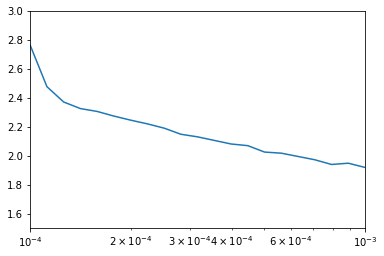

In [0]:
#plt.semilogx(cnnhistory.history["lr"], cnnhistory.history["loss"])
#plt.axis([1e-4, 1e-3, 1.5, 3])

Let's plot the loss:

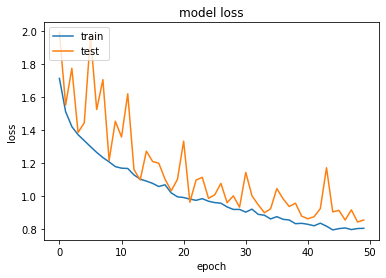

In [14]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



And now let's plot the accuracy:

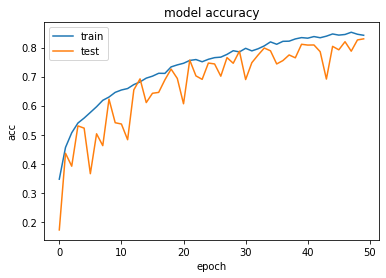

In [15]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
predictions = model.predict_classes(x_testcnn)

In [17]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       692
           1       0.79      0.82      0.81       490
           2       0.84      0.77      0.80       457
           3       0.82      0.94      0.87       455
           4       0.82      0.70      0.76       402
           5       0.76      0.62      0.69       226
           6       0.69      0.83      0.75       221

    accuracy                           0.81      2943
   macro avg       0.80      0.79      0.79      2943
weighted avg       0.82      0.81      0.81      2943



And now, the confusion matrix: it will show us the misclassified samples

In [18]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predictions)
print (matrix)
print('', sum(matrix))
# 0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fearful, 6 = disgust, 7 = surprised

[[612  24  27   4   5  12   8]
 [ 24 402   6  15  14   6  23]
 [ 40  11 351   8  28   4  15]
 [  5   7   1 426   7   5   4]
 [  4  39  26  26 282  12  13]
 [ 21   9   3  27   6 141  19]
 [  1  14   3  13   2   5 183]]
 [707 506 417 519 344 185 265]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


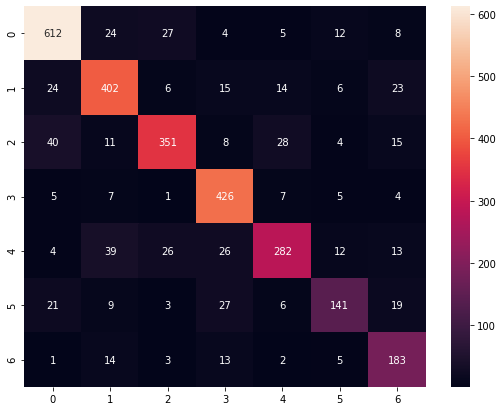

In [19]:
import seaborn as sn
import pandas as pd
df_cm = pd.DataFrame(matrix,index = [i for i in range(7)],columns = [i for i in range(7)])
plt.figure(figsize = (9,7))
sn.heatmap(df_cm, annot=True, fmt="d")

# Save the model

In [21]:
import os
model_name = 'Emotion_Voice_Detection_Model_6D.h5'
save_dir = '/content/drive/My Drive/Ravdess_model'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/Ravdess_model/Emotion_Voice_Detection_Model_6D.h5 


# Reloading the model to test it

In [22]:
loaded_model = keras.models.load_model('/content/drive/My Drive/Ravdess_model/Emotion_Voice_Detection_Model_6D.h5', custom_objects={'Loss_compute': Loss_compute})
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 40, 32)            128       
_________________________________________________________________
activation_1 (Activation)    (None, 40, 32)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 40, 32)            128       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 40, 64)            6208      
_________________________________________________________________
activation_2 (Activation)    (None, 40, 64)            0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 40, 64)            256       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 40, 28)           

# Checking the accuracy of the loaded model

In [23]:
loss, acc = loaded_model.evaluate(x_traincnn, Y_train)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

11769/11769 [==============================] - 13s 1ms/step
Restored model, accuracy: 87.99%


In [0]:
direc = ('/content/1_person.wav')
P, sample_rate = librosa.load(direc, res_type='kaiser_fast')
inp = np.mean(librosa.feature.mfcc(y=P, sr=sample_rate, n_mfcc=40).T,axis=0)
inp = np.expand_dims(inp, axis=1)

In [0]:
pro = loaded_model.predict(np.expand_dims(inp, axis=0), batch_size= 16, verbose=1)

1/1 [==============================] - 0s 34ms/step


In [0]:
pro

array([[0.5257496 , 0.09956621, 0.1250672 , 0.04727006, 0.10845221,
        0.09389478]], dtype=float32)

In [0]:
pro.argmax()

0